e:\Anaconda\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


✅ Accuracy on Test Set C: 0.9138
✅ F1-score on Test Set C: 0.8


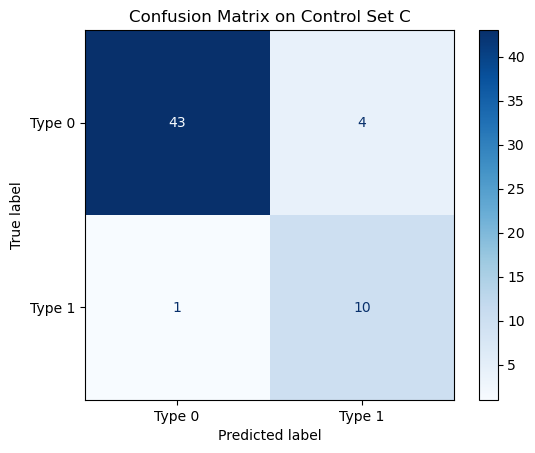

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import ADASYN  # ✅ 用于平衡训练集

# --------------------------------
# 📂 2. 加载测试集 C
# --------------------------------
df_test = pd.read_csv("../data/test_robot_v1.csv")
X_test = df_test.drop(columns=["Target"])
y_test = (df_test["Target"] == 1).astype(int)  # 转为二分类目标

# --------------------------------
# 📂 3. 加载完整训练集
# --------------------------------
df_train = pd.read_csv("../data/train_robot_v1.csv")
X_train = df_train.drop(columns=["Target"])
y_train = df_train["Target"]

# --------------------------------
# 🔄 4. 特征归一化（保持一致性）
# --------------------------------
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  # 注意使用相同 scaler

# --------------------------------
# ⚖️ 5. 用 ADASYN 平衡训练集
# --------------------------------
adasyn = ADASYN(random_state=42)
X_train_bal, y_train_bal = adasyn.fit_resample(X_train_scaled, y_train)

# --------------------------------
# 🧠 6. 构建并训练最佳模型
# --------------------------------
model = MLPClassifier(
    hidden_layer_sizes=(128, 64, 32),
    activation='relu',
    solver='lbfgs',
    max_iter=500,
    random_state=42
)
model.fit(X_train_bal, y_train_bal)

# --------------------------------
# 📈 7. 在 C 集上评估
# --------------------------------
y_pred = model.predict(X_test_scaled)

f1 = f1_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

print("✅ Accuracy on Test Set C:", round(acc, 4))
print("✅ F1-score on Test Set C:", round(f1, 4))

# --------------------------------
# 📊 8. 混淆矩阵图
# --------------------------------
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Type 0", "Type 1"])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix on Control Set C")
plt.show()


e:\Anaconda\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


✅ Accuracy on Test Set C (SMOTE): 0.9138
✅ F1-score on Test Set C (SMOTE): 0.7826


e:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


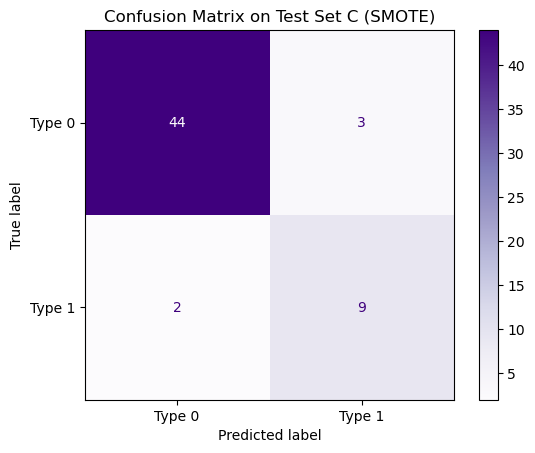

In [22]:
# --------------------------------
# 📦 1. 导入必要的库
# --------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE  # ✅ 使用 SMOTE

df_test = pd.read_csv("../data/test_robot_v1.csv")
X_test = df_test.drop(columns=["Target"])
y_test = (df_test["Target"] == 1).astype(int)  # 转为二分类目标

# --------------------------------
# 📂 3. 加载完整训练集
# --------------------------------
df_train = pd.read_csv("../data/train_robot_v1.csv")
X_train = df_train.drop(columns=["Target"])
y_train = df_train["Target"]

# --------------------------------
# 🔄 4. 特征归一化（保持一致）
# --------------------------------
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --------------------------------
# ⚖️ 5. 使用 SMOTE 平衡训练数据
# --------------------------------
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_scaled, y_train)

# --------------------------------
# 🧠 6. 定义并训练最佳模型
# --------------------------------
model = MLPClassifier(
    hidden_layer_sizes=(128,64),
    activation='relu',
    solver='lbfgs',
    max_iter=500,
    random_state=42
)
model.fit(X_train_bal, y_train_bal)

# --------------------------------
# 📈 7. 在控制集 C 上进行预测
# --------------------------------
y_pred = model.predict(X_test_scaled)

f1 = f1_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

print("✅ Accuracy on Test Set C (SMOTE):", round(acc, 4))
print("✅ F1-score on Test Set C (SMOTE):", round(f1, 4))

# --------------------------------
# 📊 8. 混淆矩阵可视化
# --------------------------------
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Type 0", "Type 1"])
disp.plot(cmap='Purples')
plt.title("Confusion Matrix on Test Set C (SMOTE)")
plt.grid(False)
plt.show()


✅ Accuracy on Test Set C (ADASYN): 0.8966
✅ F1-score on Test Set C (ADASYN): 0.75


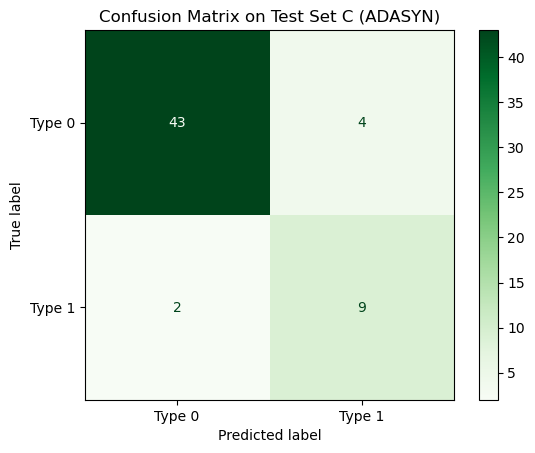

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import joblib  # ✅ 加载模型与归一化器

# --------------------------------
# 📂 1. 加载测试集 C
# --------------------------------
df_test = pd.read_csv("../data/test_robot_v1.csv")
X_test = df_test.drop(columns=["Target"])
y_test = (df_test["Target"] == 1).astype(int)

# --------------------------------
# ✅ 2. 加载预训练模型和归一化器
# --------------------------------
scaler = joblib.load("../models/minmax_scaler.pkl")
model = joblib.load("../models/best_model_adasyn.pkl")

# --------------------------------
# 🔄 3. 归一化测试集（使用训练集同一个 scaler）
# --------------------------------
X_test_scaled = scaler.transform(X_test)

# --------------------------------
# 📈 4. 进行预测（只 predict，不 fit）
# --------------------------------
y_pred = model.predict(X_test_scaled)

f1 = f1_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

print("✅ Accuracy on Test Set C (ADASYN):", round(acc, 4))
print("✅ F1-score on Test Set C (ADASYN):", round(f1, 4))

# --------------------------------
# 📊 5. 混淆矩阵可视化
# --------------------------------
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Type 0", "Type 1"])
disp.plot(cmap='Greens')
plt.title("Confusion Matrix on Test Set C (ADASYN)")
plt.grid(False)
plt.show()
